In [141]:
library(dplyr)
library(stringr)
library(ggplot2)
library(ggrepel)
library(reshape2)

# Preparation

In [142]:
#initialize ticker variables 
universe = c('IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'TSLA', 'ORCL', 'SAP')
universe_div = c('IBM','MSFT','AAPL','ORCL','SAP')

In [143]:
#read in data 
all = list()
all_div = list()
for (i in universe) {
    x = paste(i,".csv", sep="")
    df = read.csv(x)
    all[[i]] = df
    }
for (i in universe_div) {
    x = paste(i,"div.csv", sep="")
    df = read.csv(x)
    all_div[[i]] = df
    }


In [144]:
for (i in universe) {
  assign(i, all[[i]])
}

for(i in universe_div){
    assign(paste0(i,"_div"), all_div[[i]])
                    }
IBM_div$Date = as.Date(IBM_div$Date, format = "%m/%d/%Y")
MSFT_div$Date = as.Date(MSFT_div$Date, format = "%m/%d/%Y")
AAPL_div$Date = as.Date(AAPL_div$Date, format = "%m/%d/%Y")
ORCL_div$Date = as.Date(ORCL_div$Date, format = "%m/%d/%Y")
SAP_div$Date = as.Date(SAP_div$Date, format = "%m/%d/%Y")


# Retrieve the "Close" and "Adj Close" values for each stock


In [145]:
head(IBM[,c(1,5,6)])

,Date,Close,Adj.Close
,<chr>,<dbl>,<dbl>
1,1/2/2018,147.4665,113.0867
2,1/3/2018,151.5201,116.1952
3,1/4/2018,154.5889,118.5486
4,1/5/2018,155.3442,119.1278
5,1/8/2018,156.2811,119.8463
6,1/9/2018,156.6252,120.1102


In [146]:
#merge all individual df's together 
merged = merge(IBM[,c(1,5,6)], MSFT[,c(1,5,6)], by = "Date", suffixes = c("_IBM", "_MSFT"))
for (i in universe[3:length(universe)]){
    df = get(i)
    col_names = names(df)[c(5,6)]
    new_col_names = paste0(col_names, "_", i)
    names(df)[c(5,6)] = new_col_names 
    merged = merge(merged, df[,c(1,5,6)], by = "Date")
}

In [147]:
#change "Date" column to Date format 
merged$Date = as.Date(merged$Date, format = "%m/%d/%Y")
head(merged)

,Date,Close_IBM,Adj.Close_IBM,Close_MSFT,Adj.Close_MSFT,Close_GOOG,Adj.Close_GOOG,Close_AAPL,Adj.Close_AAPL,Close_AMZN,⋯,Close_FB,Adj.Close_FB,Close_NFLX,Adj.Close_NFLX,Close_TSLA,Adj.Close_TSLA,Close_ORCL,Adj.Close_ORCL,Close_SAP,Adj.Close_SAP
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-10,156.9599,120.3668,87.82,82.31483,55.1305,55.1305,43.5725,41.31276,62.7165,⋯,187.84,187.84,212.52,212.52,22.32000,22.32000,48.80,44.74147,112.87,101.64254
2,2018-01-11,156.9790,120.3815,88.08,82.55853,55.2760,55.2760,43.8200,41.54743,63.8340,⋯,187.77,187.77,217.24,217.24,22.53000,22.53000,48.95,44.87899,109.64,98.73383
3,2018-01-12,155.9656,119.6043,89.60,83.98323,56.1130,56.1130,44.2725,41.97647,65.2600,⋯,179.37,179.37,221.23,221.23,22.41467,22.41467,49.51,45.39242,110.13,99.17509
4,2018-01-16,156.6444,120.1249,88.35,82.81162,56.0880,56.0880,44.0475,41.76313,65.2430,⋯,178.39,178.39,221.53,221.53,22.67067,22.67067,49.59,45.46577,110.68,99.67039
5,2018-01-17,161.2333,123.6439,90.14,84.48939,56.5990,56.5990,44.7750,42.45291,64.7500,⋯,177.60,177.60,217.50,217.50,23.14400,23.14400,50.27,46.08921,111.19,100.12965
6,2018-01-18,161.6826,123.9885,90.10,84.45190,56.4895,56.4895,44.8150,42.49084,64.6660,⋯,179.80,179.80,220.33,220.33,22.97133,22.97133,50.23,46.05253,111.67,100.56190


In [148]:
###FINAL DF FOR THIS SECTION###

#sorting, changing prices to contain every fifth day 
prices = arrange(merged, Date)
prices2 = prices
prices = prices[seq(1, nrow(df), 5), ]
head(prices2)

,Date,Close_IBM,Adj.Close_IBM,Close_MSFT,Adj.Close_MSFT,Close_GOOG,Adj.Close_GOOG,Close_AAPL,Adj.Close_AAPL,Close_AMZN,⋯,Close_FB,Adj.Close_FB,Close_NFLX,Adj.Close_NFLX,Close_TSLA,Adj.Close_TSLA,Close_ORCL,Adj.Close_ORCL,Close_SAP,Adj.Close_SAP
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,147.4665,113.0867,85.95,80.56204,53.2500,53.2500,43.0650,40.83159,59.4505,⋯,181.42,181.42,201.07,201.07,21.36867,21.36867,46.63,42.58610,112.39,101.2103
2,2018-01-03,151.5201,116.1952,86.35,80.93695,54.1240,54.1240,43.0575,40.82447,60.2100,⋯,184.67,184.67,205.05,205.05,21.15000,21.15000,47.71,43.57244,113.31,102.0388
3,2018-01-04,154.5889,118.5486,87.11,81.64934,54.3200,54.3200,43.2575,41.01411,60.4795,⋯,184.33,184.33,205.63,205.63,20.97467,20.97467,48.18,44.00167,115.05,103.6057
4,2018-01-05,155.3442,119.1278,88.19,82.66164,55.1115,55.1115,43.7500,41.48107,61.4570,⋯,186.85,186.85,209.99,209.99,21.10533,21.10533,48.47,44.26653,116.33,104.7584
5,2018-01-08,156.2811,119.8463,88.28,82.74599,55.3470,55.3470,43.5875,41.32699,62.3435,⋯,188.28,188.28,212.05,212.05,22.42733,22.42733,48.98,44.73230,114.80,103.3806
6,2018-01-09,156.6252,120.1102,88.22,82.68976,55.3130,55.3130,43.5825,41.32225,62.6350,⋯,187.87,187.87,209.31,209.31,22.24600,22.24600,49.06,44.97985,114.16,102.8042


# 5 Days Rebalancing of Buying Low

In [149]:
#calculate %change
percent_change_df = data.frame(Date = merged$Date)
for (i in universe){
    change = arrange(merged,Date) %>% transmute(Date, change = get(paste0("Adj.Close_", i))/lag(get(paste0("Adj.Close_", i)), n=5)) 
    percent_change_df <- merge(percent_change_df, change, by = "Date")
}

Warning message in merge.data.frame(percent_change_df, change, by = "Date"):
"column names 'change.x', 'change.y' are duplicated in the result"
Warning message in merge.data.frame(percent_change_df, change, by = "Date"):
"column names 'change.x', 'change.y' are duplicated in the result"
Warning message in merge.data.frame(percent_change_df, change, by = "Date"):
"column names 'change.x', 'change.y', 'change.x', 'change.y' are duplicated in the result"
Warning message in merge.data.frame(percent_change_df, change, by = "Date"):
"column names 'change.x', 'change.y', 'change.x', 'change.y' are duplicated in the result"
Warning message in merge.data.frame(percent_change_df, change, by = "Date"):
"column names 'change.x', 'change.y', 'change.x', 'change.y', 'change.x', 'change.y' are duplicated in the result"
Warning message in merge.data.frame(percent_change_df, change, by = "Date"):
"column names 'change.x', 'change.y', 'change.x', 'change.y', 'change.x', 'change.y' are duplicated in the 

In [150]:
#change column names 
names(percent_change_df)= c("Date", "5Day%Change_IBM","5Day%Change_MSFT","5Day%Change_GOOG", "5Day%Change_AAPL", "5Day%Change_AMZN","5Day%Change_FB", "5Day%Change_NFLX","5Day%Change_TSLA","5Day%Change_ORCL","5Day%Change_SAP")

In [151]:
head(percent_change_df)

,Date,5Day%Change_IBM,5Day%Change_MSFT,5Day%Change_GOOG,5Day%Change_AAPL,5Day%Change_AMZN,5Day%Change_FB,5Day%Change_NFLX,5Day%Change_TSLA,5Day%Change_ORCL,5Day%Change_SAP
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,2018-01-03,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,2018-01-04,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,2018-01-05,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,2018-01-08,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,2018-01-09,1.062107,1.026411,1.038742,1.012017,1.053566,1.035553,1.040981,1.041057,1.05621,1.015749


In [152]:
#selling days 
every_fifth_day= percent_change_df[seq(1, nrow(df), 5), ]
head(every_fifth_day)

,Date,5Day%Change_IBM,5Day%Change_MSFT,5Day%Change_GOOG,5Day%Change_AAPL,5Day%Change_AMZN,5Day%Change_FB,5Day%Change_NFLX,5Day%Change_TSLA,5Day%Change_ORCL,5Day%Change_SAP
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,2018-01-09,1.0621071,1.0264109,1.0387418,1.0120167,1.0535655,1.0355528,1.0409807,1.0410569,1.0562096,1.0157488
11,2018-01-17,1.0294209,1.0217636,1.0232495,1.0273620,1.0337671,0.9453346,1.0391286,1.0403668,1.0246636,0.9739838
16,2018-01-24,0.9805513,1.0186376,1.0284988,0.9727527,1.0482703,1.0503941,1.2013793,0.9963418,1.0234733,1.0285998
21,2018-01-31,0.9899017,1.0347420,1.0048959,0.9610261,1.0687877,1.0018225,1.0344432,1.0243430,1.0027212,0.9902072
26,2018-02-07,0.9398289,0.9431641,0.8962682,0.9528759,0.9764902,0.9640965,0.9787644,0.9737236,0.9472765,0.9279470


In [153]:
#first step in getting the 5 stocks to buy on these days 
purchases = apply(every_fifth_day[2:length(every_fifth_day)], 1, function(row)head(sort(row),5))

In [154]:
head(purchases,2)

$`1`
named numeric(0)

$`6`
5Day%Change_AAPL  5Day%Change_SAP 5Day%Change_MSFT   5Day%Change_FB 
        1.012017         1.015749         1.026411         1.035553 
5Day%Change_GOOG 
        1.038742

In [155]:
#extract names of tickers for each rebalance day 
x = lapply(purchases, function(inner_list) {
  lapply(names(inner_list), function(subname) {
    return(subname)
  })
})

In [156]:
head(x,2)

$`1`
list()

$`6`
$`6`[[1]]
[1] "5Day%Change_AAPL"

$`6`[[2]]
[1] "5Day%Change_SAP"

$`6`[[3]]
[1] "5Day%Change_MSFT"

$`6`[[4]]
[1] "5Day%Change_FB"

$`6`[[5]]
[1] "5Day%Change_GOOG"

In [157]:
#extracting names continued 
company_names = c()
for (element in x){
    for (company in element){
        name = str_remove(company, "5Day%Change_")
        company_names = c(company_names, name)
    }
}

In [158]:
head(company_names,3)

[1] "AAPL" "SAP"  "MSFT"

In [159]:
#organize the names of the stocks to buy/sell, along with the respective dates, into one df 
buy = data.frame(Date = every_fifth_day$Date[-1],matrix(company_names, ncol=5, byrow=TRUE))
names(buy) = c("Date","Buy1","Buy2","Buy3","Buy4","Buy5")
buy = mutate(buy, Sell1 = c(NA,head(buy$Buy1, -1)))
buy =mutate(buy, Sell2 = c(NA,head(buy$Buy2, -1)))
buy = mutate(buy, Sell3 = c(NA,head(buy$Buy3, -1)))
buy= mutate(buy, Sell4 = c(NA,head(buy$Buy4, -1)))
buy = mutate(buy, Sell5 = c(NA,head(buy$Buy5, -1)))

In [160]:
#pull the close prices 
close_prices = prices[,c(1,seq(2,21,2))]
names(close_prices) = c('Date', universe)
head(close_prices)

,Date,IBM,MSFT,GOOG,AAPL,AMZN,FB,NFLX,TSLA,ORCL,SAP
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,147.4665,85.95,53.250,43.0650,59.4505,181.42,201.07,21.36867,46.63,112.39
6,2018-01-09,156.6252,88.22,55.313,43.5825,62.6350,187.87,209.31,22.24600,49.06,114.16
11,2018-01-17,161.2333,90.14,56.599,44.7750,64.7500,177.60,217.50,23.14400,50.27,111.19
16,2018-01-24,158.0975,91.82,58.212,43.5550,67.8755,186.55,261.30,23.05933,51.45,114.37
21,2018-01-31,156.5010,95.01,58.497,41.8575,72.5445,186.89,270.30,23.62067,51.59,113.25
26,2018-02-07,147.0841,89.61,52.429,39.8850,70.8390,180.18,264.56,23.00000,48.87,105.09


In [161]:
head(buy)

,Date,Buy1,Buy2,Buy3,Buy4,Buy5,Sell1,Sell2,Sell3,Sell4,Sell5
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2018-01-09,AAPL,SAP,MSFT,FB,GOOG,NA,NA,NA,NA,NA
2,2018-01-17,FB,SAP,MSFT,GOOG,ORCL,AAPL,SAP,MSFT,FB,GOOG
3,2018-01-24,AAPL,IBM,TSLA,MSFT,ORCL,FB,SAP,MSFT,GOOG,ORCL
4,2018-01-31,AAPL,IBM,SAP,FB,ORCL,AAPL,IBM,TSLA,MSFT,ORCL
5,2018-02-07,GOOG,SAP,IBM,MSFT,ORCL,AAPL,IBM,SAP,FB,ORCL
6,2018-02-14,TSLA,FB,SAP,NFLX,ORCL,GOOG,SAP,IBM,MSFT,ORCL


In [162]:
#combine buy and sell prices 
combined= merge(buy, close_prices, by="Date")
head(combined)

,Date,Buy1,Buy2,Buy3,Buy4,Buy5,Sell1,Sell2,Sell3,Sell4,⋯,IBM,MSFT,GOOG,AAPL,AMZN,FB,NFLX,TSLA,ORCL,SAP
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-09,AAPL,SAP,MSFT,FB,GOOG,NA,NA,NA,NA,⋯,156.6252,88.22,55.313,43.5825,62.6350,187.87,209.31,22.24600,49.06,114.16
2,2018-01-17,FB,SAP,MSFT,GOOG,ORCL,AAPL,SAP,MSFT,FB,⋯,161.2333,90.14,56.599,44.7750,64.7500,177.60,217.50,23.14400,50.27,111.19
3,2018-01-24,AAPL,IBM,TSLA,MSFT,ORCL,FB,SAP,MSFT,GOOG,⋯,158.0975,91.82,58.212,43.5550,67.8755,186.55,261.30,23.05933,51.45,114.37
4,2018-01-31,AAPL,IBM,SAP,FB,ORCL,AAPL,IBM,TSLA,MSFT,⋯,156.5010,95.01,58.497,41.8575,72.5445,186.89,270.30,23.62067,51.59,113.25
5,2018-02-07,GOOG,SAP,IBM,MSFT,ORCL,AAPL,IBM,SAP,FB,⋯,147.0841,89.61,52.429,39.8850,70.8390,180.18,264.56,23.00000,48.87,105.09
6,2018-02-14,TSLA,FB,SAP,NFLX,ORCL,GOOG,SAP,IBM,MSFT,⋯,147.9541,90.81,53.485,41.8425,72.5525,179.52,266.00,21.48733,49.45,105.13


In [163]:
#clean data into df3
#cols 2:11 in df3 tell us which companies we are buying/selling on rebalance days--prices of these tickers on given day are in columns directly to the right 
combined_copy = combined
close_prices2 = prices2[,c(1,seq(2,21,2))]
names(close_prices2) = c('Date', universe)
df3 = merge(x=combined_copy[,1:11],y=close_prices2, by ="Date", all=TRUE)
df3[1:5,2:6] = matrix(c("IBM","MSFT","GOOG","AAPL","AMZN"),nrow=5,ncol=5,byrow=TRUE)
df3[6:10,7:11] = matrix(c("IBM","MSFT","GOOG","AAPL","AMZN"),nrow=5,ncol=5,byrow=TRUE)
df3 = merge(df3,IBM_div, by="Date", all.x = TRUE)
df3 = merge(df3,MSFT_div, by="Date", all.x = TRUE)
df3 = merge(df3,AAPL_div, by="Date", all.x = TRUE)
df3 = merge(df3,ORCL_div, by="Date", all.x = TRUE)
df3 = merge(df3,SAP_div, by="Date", all.x = TRUE)
names(df3)[22:26] = paste0(universe_div, "_div")
head(df3)
df4=df3

Warning message in merge.data.frame(df3, ORCL_div, by = "Date", all.x = TRUE):
"column names 'Dividends.x', 'Dividends.y' are duplicated in the result"
Warning message in merge.data.frame(df3, SAP_div, by = "Date", all.x = TRUE):
"column names 'Dividends.x', 'Dividends.y' are duplicated in the result"


,Date,Buy1,Buy2,Buy3,Buy4,Buy5,Sell1,Sell2,Sell3,Sell4,⋯,FB,NFLX,TSLA,ORCL,SAP,IBM_div,MSFT_div,AAPL_div,ORCL_div,SAP_div
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,IBM,MSFT,GOOG,AAPL,AMZN,NA,NA,NA,NA,⋯,181.42,201.07,21.36867,46.63,112.39,NA,NA,NA,NA,NA
2,2018-01-03,IBM,MSFT,GOOG,AAPL,AMZN,NA,NA,NA,NA,⋯,184.67,205.05,21.15000,47.71,113.31,NA,NA,NA,NA,NA
3,2018-01-04,IBM,MSFT,GOOG,AAPL,AMZN,NA,NA,NA,NA,⋯,184.33,205.63,20.97467,48.18,115.05,NA,NA,NA,NA,NA
4,2018-01-05,IBM,MSFT,GOOG,AAPL,AMZN,NA,NA,NA,NA,⋯,186.85,209.99,21.10533,48.47,116.33,NA,NA,NA,NA,NA
5,2018-01-08,IBM,MSFT,GOOG,AAPL,AMZN,NA,NA,NA,NA,⋯,188.28,212.05,22.42733,48.98,114.80,NA,NA,NA,NA,NA
6,2018-01-09,AAPL,SAP,MSFT,FB,GOOG,IBM,MSFT,GOOG,AAPL,⋯,187.87,209.31,22.24600,49.06,114.16,NA,NA,NA,NA,NA


In [164]:
#fill tickers down the buy/sell columns for calculations of mtm later 
for (i in seq(6,nrow(df3),5)){
        z=i+4
        df3[i:z,2:11] = df3[i,2:11]
}
head(df3)

,Date,Buy1,Buy2,Buy3,Buy4,Buy5,Sell1,Sell2,Sell3,Sell4,⋯,FB,NFLX,TSLA,ORCL,SAP,IBM_div,MSFT_div,AAPL_div,ORCL_div,SAP_div
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,IBM,MSFT,GOOG,AAPL,AMZN,NA,NA,NA,NA,⋯,181.42,201.07,21.36867,46.63,112.39,NA,NA,NA,NA,NA
2,2018-01-03,IBM,MSFT,GOOG,AAPL,AMZN,NA,NA,NA,NA,⋯,184.67,205.05,21.15000,47.71,113.31,NA,NA,NA,NA,NA
3,2018-01-04,IBM,MSFT,GOOG,AAPL,AMZN,NA,NA,NA,NA,⋯,184.33,205.63,20.97467,48.18,115.05,NA,NA,NA,NA,NA
4,2018-01-05,IBM,MSFT,GOOG,AAPL,AMZN,NA,NA,NA,NA,⋯,186.85,209.99,21.10533,48.47,116.33,NA,NA,NA,NA,NA
5,2018-01-08,IBM,MSFT,GOOG,AAPL,AMZN,NA,NA,NA,NA,⋯,188.28,212.05,22.42733,48.98,114.80,NA,NA,NA,NA,NA
6,2018-01-09,AAPL,SAP,MSFT,FB,GOOG,IBM,MSFT,GOOG,AAPL,⋯,187.87,209.31,22.24600,49.06,114.16,NA,NA,NA,NA,NA


In [165]:
#substitute names in buy columns for buy prices 
for (i in 1:nrow(df3)){
    for (j in 2:6){
        name = df3[i,j]
        if (name %in% names(df3)){
            price = df3[i,name]
            df3[i,j] = price
        }
    }
}

In [166]:
#substitute names in sell columns for sell prices 
for (i in 1:nrow(df3)){
    for (j in 7:11){
        name = df3[i,j]
        if (name %in% names(df3)){
            price = df3[i,name]
            df3[i,j] = price
        }
    }
}

head(df3)

,Date,Buy1,Buy2,Buy3,Buy4,Buy5,Sell1,Sell2,Sell3,Sell4,⋯,FB,NFLX,TSLA,ORCL,SAP,IBM_div,MSFT_div,AAPL_div,ORCL_div,SAP_div
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,147.466537,85.949997,53.25,43.064999,59.4505,NA,NA,NA,NA,⋯,181.42,201.07,21.36867,46.63,112.39,NA,NA,NA,NA,NA
2,2018-01-03,151.520081,86.349998,54.124001,43.057499,60.209999,NA,NA,NA,NA,⋯,184.67,205.05,21.15000,47.71,113.31,NA,NA,NA,NA,NA
3,2018-01-04,154.588913,87.110001,54.32,43.2575,60.4795,NA,NA,NA,NA,⋯,184.33,205.63,20.97467,48.18,115.05,NA,NA,NA,NA,NA
4,2018-01-05,155.344162,88.190002,55.1115,43.75,61.457001,NA,NA,NA,NA,⋯,186.85,209.99,21.10533,48.47,116.33,NA,NA,NA,NA,NA
5,2018-01-08,156.281067,88.279999,55.347,43.587502,62.343498,NA,NA,NA,NA,⋯,188.28,212.05,22.42733,48.98,114.80,NA,NA,NA,NA,NA
6,2018-01-09,43.5825,114.160004,88.220001,187.869995,55.313,156.625244,88.220001,55.313,43.5825,⋯,187.87,209.31,22.24600,49.06,114.16,NA,NA,NA,NA,NA


In [167]:
#handle dividend columns 
df3 = merge(df3, df4[,c(1,7:11)], by = "Date")
for (i in 2:nrow(df3)){
    for (j in 27:31){
        name = df3[i,j]
        if (name %in% names(df3)){
            div = df3[i,name]
            df3[i,j] = div
        }
    }
}
head(df3)

,Date,Buy1,Buy2,Buy3,Buy4,Buy5,Sell1.x,Sell2.x,Sell3.x,Sell4.x,⋯,IBM_div,MSFT_div,AAPL_div,ORCL_div,SAP_div,Sell1.y,Sell2.y,Sell3.y,Sell4.y,Sell5.y
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2018-01-02,147.466537,85.949997,53.25,43.064999,59.4505,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,2018-01-03,151.520081,86.349998,54.124001,43.057499,60.209999,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,2018-01-04,154.588913,87.110001,54.32,43.2575,60.4795,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,2018-01-05,155.344162,88.190002,55.1115,43.75,61.457001,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,2018-01-08,156.281067,88.279999,55.347,43.587502,62.343498,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,2018-01-09,43.5825,114.160004,88.220001,187.869995,55.313,156.625244,88.220001,55.313,43.5825,⋯,NA,NA,NA,NA,NA,156.625244,88.220001,55.313,43.5825,62.634998


In [168]:
#clean and put into final_df
final_df = df3[,c(1:11,22:26)]
final_df[,seq(2,11,1)] = lapply(final_df[,seq(2,11,1)], as.double)
head(final_df)

,Date,Buy1,Buy2,Buy3,Buy4,Buy5,Sell1.x,Sell2.x,Sell3.x,Sell4.x,Sell5.x,IBM_div,MSFT_div,AAPL_div,ORCL_div,SAP_div
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,147.4665,85.95,53.2500,43.0650,59.4505,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,2018-01-03,151.5201,86.35,54.1240,43.0575,60.2100,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,2018-01-04,154.5889,87.11,54.3200,43.2575,60.4795,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,2018-01-05,155.3442,88.19,55.1115,43.7500,61.4570,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,2018-01-08,156.2811,88.28,55.3470,43.5875,62.3435,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,2018-01-09,43.5825,114.16,88.2200,187.8700,55.3130,156.6252,88.22,55.313,43.5825,62.635,NA,NA,NA,NA,NA


In [169]:
#merge w percent_change_df 
df2low = merge(x=final_df,y=percent_change_df, by ="Date", all.y=TRUE)
df2low = df2low[,1:16]
names(df2low)[7:11]=c('Sell1','Sell2','Sell3','Sell4','Sell5')
head(df2low)

,Date,Buy1,Buy2,Buy3,Buy4,Buy5,Sell1,Sell2,Sell3,Sell4,Sell5,IBM_div,MSFT_div,AAPL_div,ORCL_div,SAP_div
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,147.4665,85.95,53.2500,43.0650,59.4505,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,2018-01-03,151.5201,86.35,54.1240,43.0575,60.2100,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,2018-01-04,154.5889,87.11,54.3200,43.2575,60.4795,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,2018-01-05,155.3442,88.19,55.1115,43.7500,61.4570,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,2018-01-08,156.2811,88.28,55.3470,43.5875,62.3435,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,2018-01-09,43.5825,114.16,88.2200,187.8700,55.3130,156.6252,88.22,55.313,43.5825,62.635,NA,NA,NA,NA,NA


In [170]:
#logic to simulate the trading throughout the year 
cash = 5000000
shares_bin = c()
mtm = c()

#loop through each row 
for (i in 1:nrow(df2low)){
    #on first day, just buy, since initializing portfolio 
    if (i == 1){
        #buy
        cashperstock = cash/5
        for (j in 2:6){
            shares = floor(cashperstock/df2low[i,j])
            cash = cash - (shares*df2low[i,j])  
            shares_bin = c(shares_bin,shares)                                                                                                   
            }
            }
        
    else if((i-1)%%5 ==0){
        #these are rebalancing days 
            for (j in 2:6){
            #sell
                received = shares_bin[j-1]*df2low[i,j+5]
                cash = cash + received 
            }
        #store mtm, reset shares bin, recalcualte cashperstock based on new cash from sales 
            mtm = c(mtm,cash)
            shares_bin = c()
            cashperstock = cash/5
            for (j in 2:6){
                #buy 
                shares = floor(cashperstock/df2low[i,j])
                cash = cash - (shares*df2low[i,j])  
                shares_bin = c(shares_bin,shares)
            } 
        }
        
    else {
        #non selling days (just have to calculate mtm)
            s=c()
            for (j in 2:6){
                z = shares_bin[j-1]*df2low[i,j]
                s = c(s,z)
                }
                            #dividend payment
            for (d in 12:16){
                if(!is.na(df2low[i,d])){
                    cash = cash+(shares_bin[d-11]*df2low[i,d])
        }
            }
        #mtm calculation
        summed= sum(s)
        mtm_intermed = cash+summed
        mtm = c(mtm,mtm_intermed)
         }
    }       

In [171]:
#append mtm as new column in df2
df2low$mtm = c(5000000,mtm)
head(df2low)
df_compare_hti = df2low #for later

,Date,Buy1,Buy2,Buy3,Buy4,Buy5,Sell1,Sell2,Sell3,Sell4,Sell5,IBM_div,MSFT_div,AAPL_div,ORCL_div,SAP_div,mtm
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,147.4665,85.95,53.2500,43.0650,59.4505,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,5000000
2,2018-01-03,151.5201,86.35,54.1240,43.0575,60.2100,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,5061154
3,2018-01-04,154.5889,87.11,54.3200,43.2575,60.4795,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,5103664
4,2018-01-05,155.3442,88.19,55.1115,43.7500,61.4570,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,5164091
5,2018-01-08,156.2811,88.28,55.3470,43.5875,62.3435,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,5187051
6,2018-01-09,43.5825,114.16,88.2200,187.8700,55.3130,156.6252,88.22,55.313,43.5825,62.635,NA,NA,NA,NA,NA,5192835


In [172]:
df2low[251,17]

[1] 5416404

In [173]:
#The MTM increased from $5 million to ~ $5,416,404 EOY, using this "5 days rebalancing of buying low" strategy

# 5 Days Rebalancing of Buying High

In [174]:
#same as before, except for minor tweak to percent change formula

In [175]:
percent_change_df = data.frame(Date = merged$Date)
for (i in universe){
    change = arrange(merged,Date) %>% transmute(Date, change = get(paste0("Adj.Close_", i))/lag(get(paste0("Adj.Close_", i)), n=5)) 
    percent_change_df <- merge(percent_change_df, change, by = "Date")
}

Warning message in merge.data.frame(percent_change_df, change, by = "Date"):
"column names 'change.x', 'change.y' are duplicated in the result"
Warning message in merge.data.frame(percent_change_df, change, by = "Date"):
"column names 'change.x', 'change.y' are duplicated in the result"
Warning message in merge.data.frame(percent_change_df, change, by = "Date"):
"column names 'change.x', 'change.y', 'change.x', 'change.y' are duplicated in the result"
Warning message in merge.data.frame(percent_change_df, change, by = "Date"):
"column names 'change.x', 'change.y', 'change.x', 'change.y' are duplicated in the result"
Warning message in merge.data.frame(percent_change_df, change, by = "Date"):
"column names 'change.x', 'change.y', 'change.x', 'change.y', 'change.x', 'change.y' are duplicated in the result"
Warning message in merge.data.frame(percent_change_df, change, by = "Date"):
"column names 'change.x', 'change.y', 'change.x', 'change.y', 'change.x', 'change.y' are duplicated in the 

In [176]:
names(percent_change_df)= c("Date", "5Day%Change_IBM","5Day%Change_MSFT","5Day%Change_GOOG", "5Day%Change_AAPL", "5Day%Change_AMZN","5Day%Change_FB", "5Day%Change_NFLX","5Day%Change_TSLA","5Day%Change_ORCL","5Day%Change_SAP")

In [177]:
every_fifth_day= percent_change_df[seq(1, nrow(df), 5), ]
head(every_fifth_day)

,Date,5Day%Change_IBM,5Day%Change_MSFT,5Day%Change_GOOG,5Day%Change_AAPL,5Day%Change_AMZN,5Day%Change_FB,5Day%Change_NFLX,5Day%Change_TSLA,5Day%Change_ORCL,5Day%Change_SAP
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,2018-01-09,1.0621071,1.0264109,1.0387418,1.0120167,1.0535655,1.0355528,1.0409807,1.0410569,1.0562096,1.0157488
11,2018-01-17,1.0294209,1.0217636,1.0232495,1.0273620,1.0337671,0.9453346,1.0391286,1.0403668,1.0246636,0.9739838
16,2018-01-24,0.9805513,1.0186376,1.0284988,0.9727527,1.0482703,1.0503941,1.2013793,0.9963418,1.0234733,1.0285998
21,2018-01-31,0.9899017,1.0347420,1.0048959,0.9610261,1.0687877,1.0018225,1.0344432,1.0243430,1.0027212,0.9902072
26,2018-02-07,0.9398289,0.9431641,0.8962682,0.9528759,0.9764902,0.9640965,0.9787644,0.9737236,0.9472765,0.9279470


In [178]:
purchases = apply(every_fifth_day[2:length(every_fifth_day)], 1, function(row)tail(sort(row),5))

In [179]:
x = lapply(purchases, function(inner_list) {
  lapply(names(inner_list), function(subname) {
      return(subname)
  })
})

In [180]:
company_names = c()
for (element in x){
    for (company in element){
        name = str_remove(company, "5Day%Change_")
        company_names = c(company_names, name)
    }
}

In [181]:
buy = data.frame(Date = every_fifth_day$Date[-1],matrix(company_names, ncol=5, byrow=TRUE))
names(buy) = c("Date","Buy1","Buy2","Buy3","Buy4","Buy5")
buy = mutate(buy, Sell1 = c(NA,head(buy$Buy1, -1)))
buy =mutate(buy, Sell2 = c(NA,head(buy$Buy2, -1)))
buy = mutate(buy, Sell3 = c(NA,head(buy$Buy3, -1)))
buy= mutate(buy, Sell4 = c(NA,head(buy$Buy4, -1)))
buy = mutate(buy, Sell5 = c(NA,head(buy$Buy5, -1)))

In [182]:
close_prices = prices[,c(1,seq(2,21,2))]
names(close_prices) = c('Date', universe)
head(buy)

,Date,Buy1,Buy2,Buy3,Buy4,Buy5,Sell1,Sell2,Sell3,Sell4,Sell5
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2018-01-09,NFLX,TSLA,AMZN,ORCL,IBM,NA,NA,NA,NA,NA
2,2018-01-17,AAPL,IBM,AMZN,NFLX,TSLA,NFLX,TSLA,AMZN,ORCL,IBM
3,2018-01-24,GOOG,SAP,AMZN,FB,NFLX,AAPL,IBM,AMZN,NFLX,TSLA
4,2018-01-31,GOOG,TSLA,NFLX,MSFT,AMZN,GOOG,SAP,AMZN,FB,NFLX
5,2018-02-07,AAPL,FB,TSLA,AMZN,NFLX,GOOG,TSLA,NFLX,MSFT,AMZN
6,2018-02-14,IBM,MSFT,GOOG,AMZN,AAPL,AAPL,FB,TSLA,AMZN,NFLX


In [183]:
combined= merge(buy, close_prices, by="Date")
head(combined)

,Date,Buy1,Buy2,Buy3,Buy4,Buy5,Sell1,Sell2,Sell3,Sell4,⋯,IBM,MSFT,GOOG,AAPL,AMZN,FB,NFLX,TSLA,ORCL,SAP
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-09,NFLX,TSLA,AMZN,ORCL,IBM,NA,NA,NA,NA,⋯,156.6252,88.22,55.313,43.5825,62.6350,187.87,209.31,22.24600,49.06,114.16
2,2018-01-17,AAPL,IBM,AMZN,NFLX,TSLA,NFLX,TSLA,AMZN,ORCL,⋯,161.2333,90.14,56.599,44.7750,64.7500,177.60,217.50,23.14400,50.27,111.19
3,2018-01-24,GOOG,SAP,AMZN,FB,NFLX,AAPL,IBM,AMZN,NFLX,⋯,158.0975,91.82,58.212,43.5550,67.8755,186.55,261.30,23.05933,51.45,114.37
4,2018-01-31,GOOG,TSLA,NFLX,MSFT,AMZN,GOOG,SAP,AMZN,FB,⋯,156.5010,95.01,58.497,41.8575,72.5445,186.89,270.30,23.62067,51.59,113.25
5,2018-02-07,AAPL,FB,TSLA,AMZN,NFLX,GOOG,TSLA,NFLX,MSFT,⋯,147.0841,89.61,52.429,39.8850,70.8390,180.18,264.56,23.00000,48.87,105.09
6,2018-02-14,IBM,MSFT,GOOG,AMZN,AAPL,AAPL,FB,TSLA,AMZN,⋯,147.9541,90.81,53.485,41.8425,72.5525,179.52,266.00,21.48733,49.45,105.13


In [184]:
combined_copy = combined
close_prices2 = prices2[,c(1,seq(2,21,2))]
names(close_prices2) = c('Date', universe)
df3 = merge(x=combined_copy[,1:11],y=close_prices2, by ="Date", all=TRUE)
df3[1:5,2:6] = matrix(c("IBM","MSFT","GOOG","AAPL","AMZN"),nrow=5,ncol=5,byrow=TRUE)
df3[6:10,7:11] = matrix(c("IBM","MSFT","GOOG","AAPL","AMZN"),nrow=5,ncol=5,byrow=TRUE)
df3 = merge(df3,IBM_div, by="Date", all.x = TRUE)
df3 = merge(df3,MSFT_div, by="Date", all.x = TRUE)
df3 = merge(df3,AAPL_div, by="Date", all.x = TRUE)
df3 = merge(df3,ORCL_div, by="Date", all.x = TRUE)
df3 = merge(df3,SAP_div, by="Date", all.x = TRUE)
names(df3)[22:26] = paste0(universe_div, "_div")
head(df3)
df4=df3

Warning message in merge.data.frame(df3, ORCL_div, by = "Date", all.x = TRUE):
"column names 'Dividends.x', 'Dividends.y' are duplicated in the result"
Warning message in merge.data.frame(df3, SAP_div, by = "Date", all.x = TRUE):
"column names 'Dividends.x', 'Dividends.y' are duplicated in the result"


,Date,Buy1,Buy2,Buy3,Buy4,Buy5,Sell1,Sell2,Sell3,Sell4,⋯,FB,NFLX,TSLA,ORCL,SAP,IBM_div,MSFT_div,AAPL_div,ORCL_div,SAP_div
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,IBM,MSFT,GOOG,AAPL,AMZN,NA,NA,NA,NA,⋯,181.42,201.07,21.36867,46.63,112.39,NA,NA,NA,NA,NA
2,2018-01-03,IBM,MSFT,GOOG,AAPL,AMZN,NA,NA,NA,NA,⋯,184.67,205.05,21.15000,47.71,113.31,NA,NA,NA,NA,NA
3,2018-01-04,IBM,MSFT,GOOG,AAPL,AMZN,NA,NA,NA,NA,⋯,184.33,205.63,20.97467,48.18,115.05,NA,NA,NA,NA,NA
4,2018-01-05,IBM,MSFT,GOOG,AAPL,AMZN,NA,NA,NA,NA,⋯,186.85,209.99,21.10533,48.47,116.33,NA,NA,NA,NA,NA
5,2018-01-08,IBM,MSFT,GOOG,AAPL,AMZN,NA,NA,NA,NA,⋯,188.28,212.05,22.42733,48.98,114.80,NA,NA,NA,NA,NA
6,2018-01-09,NFLX,TSLA,AMZN,ORCL,IBM,IBM,MSFT,GOOG,AAPL,⋯,187.87,209.31,22.24600,49.06,114.16,NA,NA,NA,NA,NA


In [185]:
for (i in seq(6,nrow(df3),5)){
        z=i+4
        df3[i:z,2:11] = df3[i,2:11]
}

In [186]:
for (i in 1:nrow(df3)){
    for (j in 2:6){
        name = df3[i,j]
        if (name %in% names(df3)){
            price = df3[i,name]
            df3[i,j] = price
        }
    }
}

In [187]:
for (i in 1:nrow(df3)){
    for (j in 7:11){
        name = df3[i,j]
        if (name %in% names(df3)){
            price = df3[i,name]
            df3[i,j] = price
        }
    }
}

In [188]:
#handle dividend columns 
df3 = merge(df3, df4[,c(1,7:11)], by = "Date")
for (i in 2:nrow(df3)){
    for (j in 27:31){
        name = df3[i,j]
        if (name %in% names(df3)){
            div = df3[i,name]
            df3[i,j] = div
        }
    }
}
head(df3)

,Date,Buy1,Buy2,Buy3,Buy4,Buy5,Sell1.x,Sell2.x,Sell3.x,Sell4.x,⋯,IBM_div,MSFT_div,AAPL_div,ORCL_div,SAP_div,Sell1.y,Sell2.y,Sell3.y,Sell4.y,Sell5.y
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2018-01-02,147.466537,85.949997,53.25,43.064999,59.4505,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,2018-01-03,151.520081,86.349998,54.124001,43.057499,60.209999,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,2018-01-04,154.588913,87.110001,54.32,43.2575,60.4795,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,2018-01-05,155.344162,88.190002,55.1115,43.75,61.457001,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,2018-01-08,156.281067,88.279999,55.347,43.587502,62.343498,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,2018-01-09,209.309998,22.246,62.634998,49.060001,156.625244,156.625244,88.220001,55.313,43.5825,⋯,NA,NA,NA,NA,NA,156.625244,88.220001,55.313,43.5825,62.634998


In [189]:
final_df = df3[,c(1:11,22:26)]
final_df[,seq(2,11,1)] = lapply(final_df[,seq(2,11,1)], as.double)
head(final_df)

,Date,Buy1,Buy2,Buy3,Buy4,Buy5,Sell1.x,Sell2.x,Sell3.x,Sell4.x,Sell5.x,IBM_div,MSFT_div,AAPL_div,ORCL_div,SAP_div
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,147.4665,85.950,53.2500,43.0650,59.4505,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,2018-01-03,151.5201,86.350,54.1240,43.0575,60.2100,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,2018-01-04,154.5889,87.110,54.3200,43.2575,60.4795,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,2018-01-05,155.3442,88.190,55.1115,43.7500,61.4570,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,2018-01-08,156.2811,88.280,55.3470,43.5875,62.3435,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,2018-01-09,209.3100,22.246,62.6350,49.0600,156.6252,156.6252,88.22,55.313,43.5825,62.635,NA,NA,NA,NA,NA


In [190]:
df2high = merge(x=final_df,y=percent_change_df, by ="Date", all.y=TRUE)
df2high = df2high[,1:16]
names(df2high)[7:11]=c('Sell1','Sell2','Sell3','Sell4','Sell5')
head(df2high)

,Date,Buy1,Buy2,Buy3,Buy4,Buy5,Sell1,Sell2,Sell3,Sell4,Sell5,IBM_div,MSFT_div,AAPL_div,ORCL_div,SAP_div
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,147.4665,85.950,53.2500,43.0650,59.4505,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,2018-01-03,151.5201,86.350,54.1240,43.0575,60.2100,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,2018-01-04,154.5889,87.110,54.3200,43.2575,60.4795,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,2018-01-05,155.3442,88.190,55.1115,43.7500,61.4570,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,2018-01-08,156.2811,88.280,55.3470,43.5875,62.3435,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,2018-01-09,209.3100,22.246,62.6350,49.0600,156.6252,156.6252,88.22,55.313,43.5825,62.635,NA,NA,NA,NA,NA


In [191]:
cash = 5000000
shares_bin = c()
mtm = c()

#loop through each row (sell/buy dates)
for (i in 1:nrow(df2high)){
    #on first day, just buy, since initializing portfolio 
    if (i == 1){
        #buy
        cashperstock = cash/5
        for (j in 2:6){
            shares = floor(cashperstock/df2high[i,j])
            cash = cash - (shares*df2high[i,j])  
            shares_bin = c(shares_bin,shares)
            }
        }
    else if((i-1)%%5 ==0){
        #these are sell/buy days 
            for (j in 2:6){
            #sell
                received = shares_bin[j-1]*df2high[i,j+5]
                cash = cash + received 
            }
            mtm = c(mtm,cash)
            shares_bin = c()
            cashperstock = cash/5
            for (j in 2:6){
                #buy 
                shares = floor(cashperstock/df2high[i,j])
                cash = cash - (shares*df2high[i,j])  
                shares_bin = c(shares_bin,shares)
            } 
        }
        
    else if (i>6){
        #non selling days (just have to calculate mtm)
            s=c()
            for (j in 2:6){
                z = shares_bin[j-1]*df2high[i,j]
                s = c(s,z)
            }
                                    #dividend payment 
            for (d in 12:16){
                if(!is.na(df2high[i,d])){
                    cash = cash+(shares_bin[d-11]*df2high[i,d])
        }
            }
        summed= sum(s)
        mtm_intermed = cash+summed
        mtm = c(mtm,mtm_intermed)
         }
}       

In [192]:
df2high$mtm = c(NA,NA,NA,NA,NA,mtm)
head(df2high)

,Date,Buy1,Buy2,Buy3,Buy4,Buy5,Sell1,Sell2,Sell3,Sell4,Sell5,IBM_div,MSFT_div,AAPL_div,ORCL_div,SAP_div,mtm
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,147.4665,85.950,53.2500,43.0650,59.4505,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,2018-01-03,151.5201,86.350,54.1240,43.0575,60.2100,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,2018-01-04,154.5889,87.110,54.3200,43.2575,60.4795,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,2018-01-05,155.3442,88.190,55.1115,43.7500,61.4570,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,2018-01-08,156.2811,88.280,55.3470,43.5875,62.3435,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,2018-01-09,209.3100,22.246,62.6350,49.0600,156.6252,156.6252,88.22,55.313,43.5825,62.635,NA,NA,NA,NA,NA,5192835


In [193]:
df2high[251,17]

[1] 4947517

In [194]:
##The EOY MTM actually decreased from $5 million to ~ $4,947,517 using this "5 days rebalancing of buying high" strategy

# MTM Series vs High Tech Index

In [195]:
#compute HTI in new column
a = close_prices2 %>% mutate(HTI = (IBM + MSFT+GOOG+AAPL+AMZN+FB+NFLX+TSLA+ORCL+SAP)/10)

In [196]:
#assemble new df for graph
comparison = data.frame(Date= close_prices2$Date, HTI = a$HTI, MTM = df_compare_hti$mtm)
head(comparison)

,Date,HTI,MTM
,<date>,<dbl>,<dbl>
1,2018-01-02,95.20607,5000000
2,2018-01-03,96.71516,5061154
3,2018-01-04,97.39206,5103664
4,2018-01-05,98.65980,5164091
5,2018-01-08,99.23764,5187051
6,2018-01-09,98.90217,5192835


In [197]:
#calculate % change with respect to 1/2/18
comparison = comparison %>% mutate(HTI_change = (HTI - HTI[1]) / HTI[1] * 100) %>% mutate(MTM_change = (MTM - MTM[1]) / MTM[1] * 100) 
comparison[1,4:5] = 1

In [198]:
head(comparison)

,Date,HTI,MTM,HTI_change,MTM_change
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,95.20607,5000000,1.000000,1.000000
2,2018-01-03,96.71516,5061154,1.585074,1.223084
3,2018-01-04,97.39206,5103664,2.296060,2.073270
4,2018-01-05,98.65980,5164091,3.627637,3.281811
5,2018-01-08,99.23764,5187051,4.234572,3.741018
6,2018-01-09,98.90217,5192835,3.882214,3.856703


In [199]:
#take subset of df
comparison2 = comparison[,c(1,4,5)]

In [200]:
#melt df for simplicity reasons in ggplot code 
comparison2 = melt(comparison2, id.vars="Date")
names(comparison2)[2]="Variable"

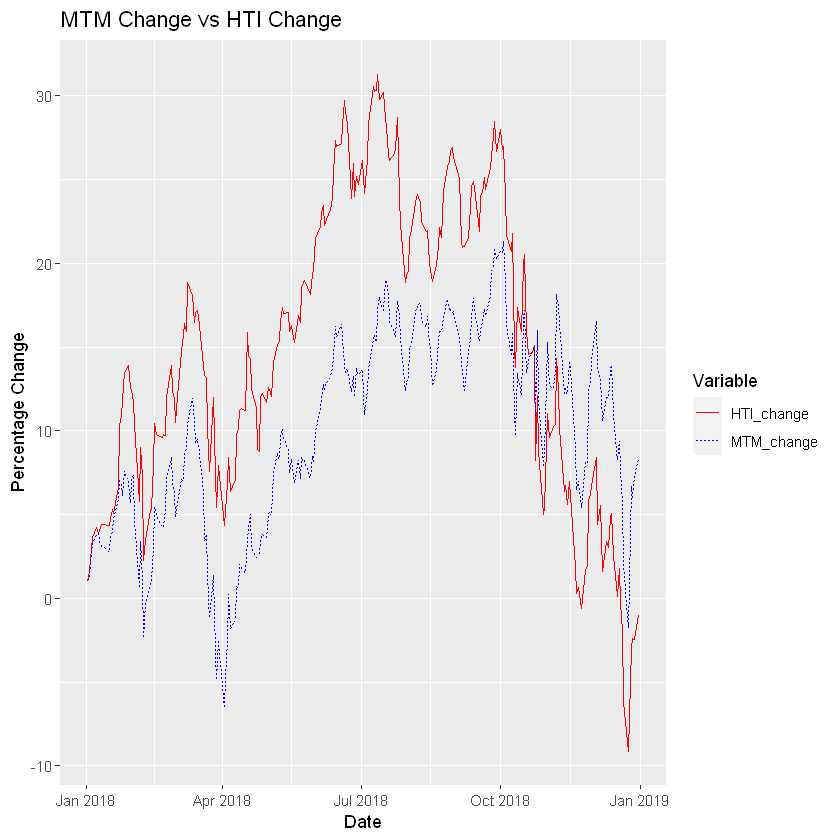

In [201]:
ggplot(data = comparison2, aes(x=Date, y=value))+geom_line(aes(color=Variable,linetype=Variable))+labs(x = "Date", y = "Percentage Change")+ggtitle("MTM Change vs HTI Change")+theme_gray()+scale_color_manual(values = c("red", "blue"))

# Second Figure - Change of MTM in JPY

In [202]:
jpy = read.csv("JPY.csv")

In [203]:
jpy = jpy[,c(1,5)]
jpy = jpy[-1,]
head(jpy)

,Date,Close
,<chr>,<dbl>
2,1/2/2018,112.770
3,1/3/2018,112.244
4,1/4/2018,112.607
5,1/5/2018,112.783
6,1/8/2018,113.154
7,1/9/2018,113.141


In [204]:
#format column datatype, merge with existing mtm change calculations 
jpy$Date= as.Date(jpy$Date, format = "%m/%d/%Y")
df_jpy=merge(x=comparison, y=jpy, all.x=TRUE)
head(df_jpy)

,Date,HTI,MTM,HTI_change,MTM_change,Close
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,95.20607,5000000,1.000000,1.000000,112.770
2,2018-01-03,96.71516,5061154,1.585074,1.223084,112.244
3,2018-01-04,97.39206,5103664,2.296060,2.073270,112.607
4,2018-01-05,98.65980,5164091,3.627637,3.281811,112.783
5,2018-01-08,99.23764,5187051,4.234572,3.741018,113.154
6,2018-01-09,98.90217,5192835,3.882214,3.856703,113.141


In [205]:
#calculate % mtm change in JPY
df_jpy = df_jpy %>% mutate(MTM_jpy = MTM*Close) %>% mutate(MTM_change_jpy = (MTM_jpy - MTM_jpy[1]) / MTM_jpy[1] * 100)
df_jpy[1,8]=1
head(df_jpy)

,Date,HTI,MTM,HTI_change,MTM_change,Close,MTM_jpy,MTM_change_jpy
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,95.20607,5000000,1.000000,1.000000,112.770,563849985,1.000000
2,2018-01-03,96.71516,5061154,1.585074,1.223084,112.244,568084205,0.750948
3,2018-01-04,97.39206,5103664,2.296060,2.073270,112.607,574708246,1.925736
4,2018-01-05,98.65980,5164091,3.627637,3.281811,112.783,582421611,3.293718
5,2018-01-08,99.23764,5187051,4.234572,3.741018,113.154,586935550,4.094274
6,2018-01-09,98.90217,5192835,3.882214,3.856703,113.141,587522554,4.198381


In [206]:
#same as above, melting for simplicity reasons 
df_jpy2 = df_jpy[,c(1,5,8)]
df_jpy2=melt(df_jpy2, id.vars = c("Date"))
names(df_jpy2)[2]="Variable"
head(df_jpy2)

,Date,Variable,value
,<date>,<fct>,<dbl>
1,2018-01-02,MTM_change,1.000000
2,2018-01-03,MTM_change,1.223084
3,2018-01-04,MTM_change,2.073270
4,2018-01-05,MTM_change,3.281811
5,2018-01-08,MTM_change,3.741018
6,2018-01-09,MTM_change,3.856703


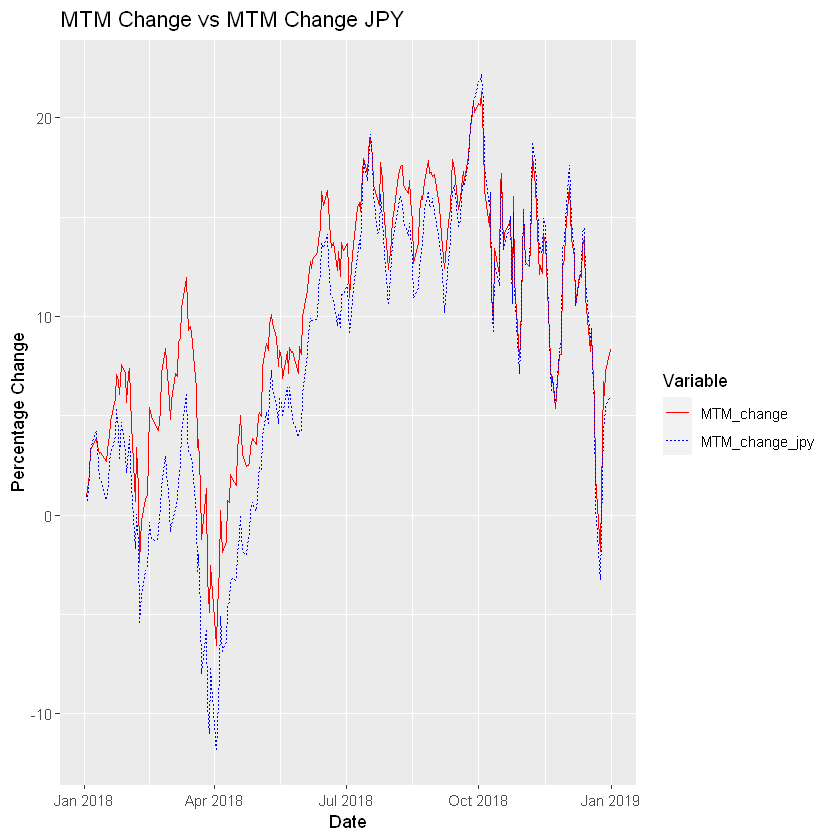

In [207]:
ggplot(data = df_jpy2, aes(x=Date, y=value))+geom_line(aes(color=Variable,linetype=Variable))+labs(x = "Date", y = "Percentage Change")+ggtitle("MTM Change vs MTM Change JPY")+theme_gray()+scale_color_manual(values = c("red", "blue"))

# Testing Rebalancing of Buying Low with Different Rebalancing Periods 

In [208]:
#same code as earlier, except minor tweak in the large for loop at end

In [209]:
percent_change_df = data.frame(Date = merged$Date)
for (i in universe){
    change = arrange(merged,Date) %>% transmute(Date, change = get(paste0("Adj.Close_", i))/lag(get(paste0("Adj.Close_", i)), n=5)) 
    percent_change_df <- merge(percent_change_df, change, by = "Date")
}
names(percent_change_df)= c("Date", "5Day%Change_IBM","5Day%Change_MSFT","5Day%Change_GOOG", "5Day%Change_AAPL", "5Day%Change_AMZN","5Day%Change_FB", "5Day%Change_NFLX","5Day%Change_TSLA","5Day%Change_ORCL","5Day%Change_SAP")
every_fifth_day= percent_change_df[seq(1, nrow(df), 5), ]
purchases = apply(every_fifth_day[2:length(every_fifth_day)], 1, function(row)tail(sort(row),5))
x = lapply(purchases, function(inner_list) {
  lapply(names(inner_list), function(subname) {
    return(subname)
  })
})
company_names = c()
for (element in x){
    for (company in element){
        name = str_remove(company, "5Day%Change_")
        company_names = c(company_names, name)
    }
}
buy = data.frame(Date = every_fifth_day$Date[-1],matrix(company_names, ncol=5, byrow=TRUE))
names(buy) = c("Date","Buy1","Buy2","Buy3","Buy4","Buy5")
buy = mutate(buy, Sell1 = c(NA,head(buy$Buy1, -1)))
buy =mutate(buy, Sell2 = c(NA,head(buy$Buy2, -1)))
buy = mutate(buy, Sell3 = c(NA,head(buy$Buy3, -1)))
buy= mutate(buy, Sell4 = c(NA,head(buy$Buy4, -1)))
buy = mutate(buy, Sell5 = c(NA,head(buy$Buy5, -1)))
close_prices = prices[,c(1,seq(2,21,2))]
names(close_prices) = c('Date', universe)
combined= merge(buy, close_prices, by="Date")
combined_copy = combined
close_prices2 = prices2[,c(1,seq(2,21,2))]
names(close_prices2) = c('Date', universe)
df3 = merge(x=combined_copy[,1:11],y=close_prices2, by ="Date", all=TRUE)
df3[1:5,2:6] = matrix(c("IBM","MSFT","GOOG","AAPL","AMZN"),nrow=5,ncol=5,byrow=TRUE)
df3[6:10,7:11] = matrix(c("IBM","MSFT","GOOG","AAPL","AMZN"),nrow=5,ncol=5,byrow=TRUE)
df3 = merge(df3,IBM_div, by="Date", all.x = TRUE)
df3 = merge(df3,MSFT_div, by="Date", all.x = TRUE)
df3 = merge(df3,AAPL_div, by="Date", all.x = TRUE)
df3 = merge(df3,ORCL_div, by="Date", all.x = TRUE)
df3 = merge(df3,SAP_div, by="Date", all.x = TRUE)
names(df3)[22:26] = paste0(universe_div, "_div")
df4=df3
for (i in seq(6,nrow(df3),5)){
        z=i+4
        df3[i:z,2:11] = df3[i,2:11]
}
for (i in 1:nrow(df3)){
    for (j in 2:6){
        name = df3[i,j]
        if (name %in% names(df3)){
            price = df3[i,name]
            df3[i,j] = price
        }
    }
}
for (i in 1:nrow(df3)){
    for (j in 7:11){
        name = df3[i,j]
        if (name %in% names(df3)){
            price = df3[i,name]
            df3[i,j] = price
        }
    }
}
#handle dividend columns 
df3 = merge(df3, df4[,c(1,7:11)], by = "Date")
for (i in 2:nrow(df3)){
    for (j in 27:31){
        name = df3[i,j]
        if (name %in% names(df3)){
            div = df3[i,name]
            df3[i,j] = div
        }
    }
}
final_df = df3[,c(1:11,22:26)]
final_df[,seq(2,11,1)] = lapply(final_df[,seq(2,11,1)], as.double)
df2diff = merge(x=final_df,y=percent_change_df, by ="Date", all.y=TRUE)
df2diff = df2high[,1:16]
names(df2diff)[7:11]=c('Sell1','Sell2','Sell3','Sell4','Sell5')
cash = 5000000
shares_bin = c()
mtm = c()
frequency=6

#loop through each row (sell/buy dates)
for (i in 1:nrow(df2diff)){
    #on first day, just buy, since initializing portfolio 
    if (i == 1){
        #buy
        cashperstock = cash/5
        for (j in 2:6){
            shares = floor(cashperstock/df2diff[i,j])
            cash = cash - (shares*df2diff[i,j])  
            shares_bin = c(shares_bin,shares)
            }
        }
    else if((i-1)%%frequency ==0){         ###adjusting for strategy###
        #these are sell/buy days 
            for (j in 2:6){
            #sell
                received = shares_bin[j-1]*df2diff[i,j+5]
                cash = cash + received 
            }
            mtm = c(mtm,cash)
            shares_bin = c()
            cashperstock = cash/5
            for (j in 2:6){
                #buy 
                shares = floor(cashperstock/df2diff[i,j])
                cash = cash - (shares*df2diff[i,j])  
                shares_bin = c(shares_bin,shares)
            } 
        }
        
    else if (i>6){
        #non selling days (just have to calculate mtm)
            s=c()
            for (j in 2:6){
                z = shares_bin[j-1]*df2diff[i,j]
                s = c(s,z)
            }
                                    #dividend payment
            for (d in 12:16){
                if(!is.na(df2diff[i,d])){
                    cash = cash+(shares_bin[d-11]*df2diff[i,d])
        }
            }
        summed= sum(s)
        mtm_intermed = cash+summed
        mtm = c(mtm,mtm_intermed)
         }
}       
df2diff$mtm = c(NA,NA,NA,NA,NA,NA,mtm)
head(df2diff,10)

Warning message in merge.data.frame(percent_change_df, change, by = "Date"):
"column names 'change.x', 'change.y' are duplicated in the result"
Warning message in merge.data.frame(percent_change_df, change, by = "Date"):
"column names 'change.x', 'change.y' are duplicated in the result"
Warning message in merge.data.frame(percent_change_df, change, by = "Date"):
"column names 'change.x', 'change.y', 'change.x', 'change.y' are duplicated in the result"
Warning message in merge.data.frame(percent_change_df, change, by = "Date"):
"column names 'change.x', 'change.y', 'change.x', 'change.y' are duplicated in the result"
Warning message in merge.data.frame(percent_change_df, change, by = "Date"):
"column names 'change.x', 'change.y', 'change.x', 'change.y', 'change.x', 'change.y' are duplicated in the result"
Warning message in merge.data.frame(percent_change_df, change, by = "Date"):
"column names 'change.x', 'change.y', 'change.x', 'change.y', 'change.x', 'change.y' are duplicated in the 

,Date,Buy1,Buy2,Buy3,Buy4,Buy5,Sell1,Sell2,Sell3,Sell4,Sell5,IBM_div,MSFT_div,AAPL_div,ORCL_div,SAP_div,mtm
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,147.4665,85.95000,53.2500,43.0650,59.4505,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,2018-01-03,151.5201,86.35000,54.1240,43.0575,60.2100,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,2018-01-04,154.5889,87.11000,54.3200,43.2575,60.4795,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,2018-01-05,155.3442,88.19000,55.1115,43.7500,61.4570,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,2018-01-08,156.2811,88.28000,55.3470,43.5875,62.3435,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,2018-01-09,209.3100,22.24600,62.6350,49.0600,156.6252,156.6252,88.22,55.3130,43.5825,62.6350,NA,NA,NA,NA,NA,NA
7,2018-01-10,212.5200,22.32000,62.7165,48.8000,156.9599,156.9599,87.82,55.1305,43.5725,62.7165,NA,NA,NA,NA,NA,5188162
8,2018-01-11,217.2400,22.53000,63.8340,48.9500,156.9790,156.9790,88.08,55.2760,43.8200,63.8340,NA,NA,NA,NA,NA,5242771
9,2018-01-12,221.2300,22.41467,65.2600,49.5100,155.9656,155.9656,89.60,56.1130,44.2725,65.2600,NA,NA,NA,NA,NA,5285689


In [210]:
#rebalancing every 6 days, instead of 5, positively increased the EOY MTM